# erthaos-11

In [1]:
maerchen="" 
import xml.etree.ElementTree as ET
root_node = ET.parse('Textkorpus.xml').getroot()
never_saved = True
for ganze in root_node.findall(".//{http://www.tei-c.org/ns/1.0}text"):
    if ('deu' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']):
        #and '' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
        #and '' not in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']):
        for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
            for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}seg"):
                        labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                        labelb1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b1}ana']
                        labelb2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b2}ana']
                        labelb3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b3}ana']
                        labelb4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b4}ana']
                        labelb5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b5}ana']
                        labelc1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c1}ana']
                        labelc2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c2}ana']
                        labelc3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c3}ana']
                        labelc4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c4}ana']
                        labelc5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c5}ana']
                        labeld = phrase.attrib['{www.dglab.uni-jena.de/vmf/d}ana']
                        quelle= ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                        inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                                  .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                                  .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                                  .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                                  .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                                  .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                                  .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                                  .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                                  .replace(')','').replace('*','').replace("\n","\n")
                                  .replace("'''",""))
                        if labela.startswith('a') and labela!='N':
                            
                            maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','
                                         +labelc2+','+labelb3+','+labelc3+','+labelb4+','+labelc4+','
                                         +labelb5+','+labelc5+','+labeld+','+inhalt+',0'+'\n')
#                             maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','+labelc2+','
#                                          +labelb3+','+labelc3+','+labelb4+','+labelc4+','
#                                          +labelb5+','+labelc5+','+inhalt+',0'+'\n')

with open("text.csv", 'w', encoding='utf-8') as f:
    f.write('quelle,labela,labelb1,labelc1,labelb2,labelc2,labelb3,labelc3,labelb4,labelc4,labelb5,labelc5,labeld,inhalt,index_binar')
    f.write('\n')
    f.write(maerchen)

In [54]:
abcd1=""
abcd2=""
abcd3=""
abcd4=""
abcd5=""
import pandas as pd
from collections import Counter
df = pd.read_csv('text.csv',  encoding='utf-8')
abcd1 += df.quelle+','+df.labela+':'+df.labelb1+':'+df.labelc1+':'+df.labeld+','+df.inhalt+',0'
abcd2 += df.quelle+','+df.labela+':'+df.labelb2+':'+df.labelc2+':'+df.labeld+','+df.inhalt+',0'
abcd3 += df.quelle+','+df.labela+':'+df.labelb3+':'+df.labelc3+':'+df.labeld+','+df.inhalt+',0'
abcd4 += df.quelle+','+df.labela+':'+df.labelb4+':'+df.labelc4+':'+df.labeld+','+df.inhalt+',0'
abcd5 += df.quelle+','+df.labela+':'+df.labelb5+':'+df.labelc5+':'+df.labeld+','+df.inhalt+',0'
# maca=':0:'
# for t in abcd3:
#     if maca not in t:
recorded=(abcd1+'\n'+abcd2+'\n'+abcd3+'\n'+abcd4+'\n'+abcd5+'\n')
with open("text_aw.csv", 'w', encoding='utf-8') as w:
    w.write('quelle,index_string,inhalt,index_binar\n')
    w.write('000:ballast,ballast,ballast,0\n')
    w.write("".join(recorded))
    w.close()

In [55]:
import csv
mom=[]
with open('text_aw.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f) 
    for line in reader:
        if ':N:' not in line[1]:
            mom.append(line)

In [56]:
import shutil, os
with open ('text_ax.txt', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(mom)

In [57]:
with open('text_ax.txt', 'r', encoding='utf-8') as file:
    filedata = file.read()
filedata = (filedata.replace(']","[', "\n").replace('"[','').replace(']"','')
            .replace(" '","").replace("'",""))
with open('text_ay.csv', 'w', encoding='utf-8') as file:
    file.write(filedata)  

In [58]:
custom_stop_word_list=[]
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
NLTK_stop_words_list=stopwords.words('russian')
stpw = custom_stop_word_list + NLTK_stop_words_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elguj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
import pandas as pd
from collections import Counter
df = pd.read_csv('text_ay.csv',  encoding='utf-8')
indexliste=Counter(df.index_string)
print(*indexliste, sep='\n')

ballast
a551:h:Krankheit:rHH
a551:F:Anregen_zu_Beauftragungen:rHH_rVB
a551:F:Heilmittel_beschaffen:rHH_fHD
a551:f:Anlocken:fHD_fVB
a551:h:Anlocken_nachgehen:fHD_fVB
a551:f:Festnahme_bzw_Sperren:fHD_fVB
a551:F:Werben_um_den_Auftrag:rHD_rHH
a551:f:Anlocken:rHD_fVB
a551:H:Anlocken_nachgehen:rHD_fVB
a551:H:Reittier_erhalten:rHD_rST
a551:Hh:Überweisung_an_anderen_Stifter_oder_Helfer:rHD_rST
a551:H:Handlungsanweisung_Heilmittel_ergreifen:rHD_rST
a551:H:Besitzer_des_Objektes_ergreifen:rHD_rBZ
a551:F:Markieren:rHD_rBZ
a551:H:Heilmittel_ergreifen:rHD_rBZ
a551:h:Kontakt_abbrechen:rHD_rBZ
a551:H:Pförtner_entkommen:rHD_fHF
a551:F:Zurückgreifen:rHD_rST_rZM
a551:H:Zaubermittel_erhalten:rHD_rST_rZM
a551:H:Reittier_erhalten:rHD_rST_rZM
a551:H:Handlungsanweisung_Missetat_beheben:rHD_rST_rZM
a551:Hh:Handlungsanweisung_missachten:N
a551:Hh:Sorge_um_Freikaufsbedürftigen:N
a551:h:Missetat_planen:fHD
a551:f:Todesauftrag:rHD_rVB_fHD
a551:H:Todesauftrag_entkommen:rHD_rVB_fHD
a551:h:Verbannung:rHD_rVB_fHD
a551

In [60]:
gesep_a ="a551:F:Markieren:rHD_rBZ"
gesep_b = ""
gesep_c = ""
gesep_d = ""

In [61]:
for i, gesuchte_label in enumerate(df.index_string):
    if gesep_a in gesuchte_label:# or gesep_b in gesuchte_label:# and gesep_c in gesuchte_label:# or gesep_d in gesuchte_label:
        print(i, gesuchte_label)
        df.index_binar.iloc[i]='1'
df.to_csv('text_lab.csv', encoding='utf-8', index=False)

20 a551:F:Markieren:rHD_rBZ
84 a551:F:Markieren:rHD_rBZ_rZO
143 a551:F:Markieren:rHD_rBZ_rZO
364 a551:F:Markieren:rHD_rBZ_rZO


C:\Users\elguj\AppData\Local\Temp\ipykernel_1592\2408669005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.index_binar.iloc[i]='1'


In [62]:
df = pd.read_csv('text_lab.csv',  encoding='utf-8')
X_train=(df['inhalt'])
y_train=(df['index_binar'])
indexliste=Counter(df.index_binar)
print(indexliste, sep='\n')

Counter({0: 383, 1: 4})


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words=stpw, ngram_range=(1,1), norm=None), 
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}     
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Bester Score aus der Kreuzvalidierung: {:.2f}".format(grid.best_score_))

C:\Users\elguj\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\elguj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\elguj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

Bester Score aus der Kreuzvalidierung: 0.99


C:\Users\elguj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
import numpy as np
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
max_value = vectorizer.transform(X_train).max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names_out())
print("Gesamte Anzahl der Wörter: {}".format(len(vectorizer.vocabulary_)))

Gesamte Anzahl der Wörter: 1816


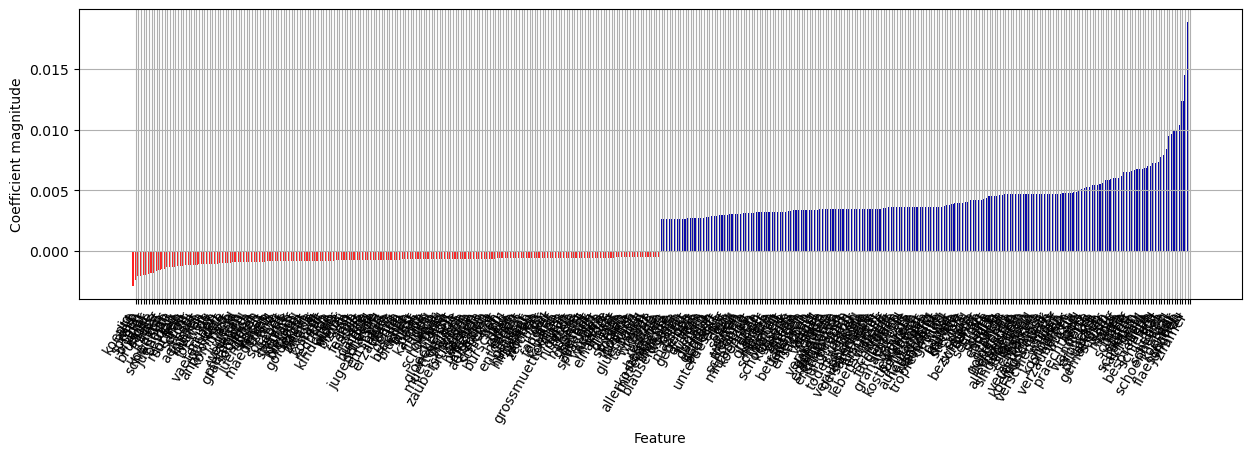

In [65]:
s_zahl = 200
import matplotlib.pyplot as plt
import mglearn
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names,  n_top_features=s_zahl)
plt.grid()

In [86]:
gio=(grid.best_estimator_.named_steps["logisticregression"].coef_[0])
n_top=np.argsort(gio)
z_top=np.sort(gio)
text_pos=feature_names[n_top[-s_zahl:]]
text_neg=feature_names[n_top[0:s_zahl]]
zahl_pos=gio[n_top[-s_zahl:]]
zahl_neg=gio[n_top[0:s_zahl]]
print("Positive Merkmale:\n{}".format(text_pos))
#print ("Negative Merkmale:\n{}".format(text_neg))
#print ("Positive coef:\n{}".format(zahl_pos))
#print ("Negative coef:\n{}".format(zahl_neg))

Positive Merkmale:
['begierde' 'allerkostbarsten' 'mitternachts' 'muesse' 'mochte'
 'blauseidenen' 'woelfe' 'kann' 'oben' 'massen' 'tat' 'neigte' 'gegeben'
 'lust' 'dritten' 'tun' 'weiten' 'ludwig' 'danach' 'rabe' 'gemach'
 'schlaeft' 'bedeckt' 'unterdessen' 'ehre' 'hof' 'dem' 'zog' 'sollen'
 'stand' 'warten' 'tropfen' 'schoepfte' 'leise' 'mittagszeit' 'koennen'
 'ihn' 'erste' 'raben' 'glaeser' 'stiess' 'herzen' 'merkte' 'schliefen'
 'wenig' 'worten' 'schoenheit' 'kuesste' 'stueck' 'davon' 'zerriss'
 'fuelle' 'tueren' 'betrachten' 'felleisen' 'mensch' 'eintreten' 'sachen'
 'desto' 'angst' 'voegel' 'seite' 'folgen' 'verwahrte' 'darinnen'
 'schaetze' 'entbrannte' 'oeffneten' 'entflammte' 'schlossen' 'begoss'
 'jungfrauen' 'sinn' 'hemd' 'todeswasser' 'traenken' 'quell' 'gelangte'
 'verjuengende' 'gemaechern' 'sammelte' 'mark' 'frischem' 'ermattet'
 'lebenswasser' 'stelle' 'hinauf' 'schwarze' 'fuellt' 'furchtbare'
 'glauben' 'entfloh' 'granataepfel' 'je' 'wassers' 'beugte' 'leuchtete'
 'ko

In [87]:
kfz=range(s_zahl)
folgenum=0
for x in kfz:
    folgenum+=1
    vollliste=(zahl_pos[s_zahl-folgenum])+(zahl_neg[s_zahl-folgenum])
    rundliste=(round(vollliste,3))
    print(rundliste, '-', x)

0.018 - 0
0.014 - 1
0.012 - 2
0.01 - 3
0.009 - 4
0.009 - 5
0.009 - 6
0.009 - 7
0.008 - 8
0.007 - 9
0.007 - 10
0.007 - 11
0.007 - 12
0.007 - 13
0.006 - 14
0.006 - 15
0.006 - 16
0.006 - 17
0.006 - 18
0.006 - 19
0.006 - 20
0.006 - 21
0.006 - 22
0.006 - 23
0.006 - 24
0.006 - 25
0.005 - 26
0.005 - 27
0.005 - 28
0.005 - 29
0.005 - 30
0.005 - 31
0.005 - 32
0.005 - 33
0.005 - 34
0.005 - 35
0.005 - 36
0.005 - 37
0.005 - 38
0.005 - 39
0.005 - 40
0.004 - 41
0.004 - 42
0.004 - 43
0.004 - 44
0.004 - 45
0.004 - 46
0.004 - 47
0.004 - 48
0.004 - 49
0.004 - 50
0.004 - 51
0.004 - 52
0.004 - 53
0.004 - 54
0.004 - 55
0.004 - 56
0.004 - 57
0.004 - 58
0.004 - 59
0.004 - 60
0.004 - 61
0.004 - 62
0.004 - 63
0.004 - 64
0.004 - 65
0.004 - 66
0.004 - 67
0.004 - 68
0.004 - 69
0.004 - 70
0.004 - 71
0.004 - 72
0.004 - 73
0.004 - 74
0.004 - 75
0.004 - 76
0.004 - 77
0.004 - 78
0.004 - 79
0.004 - 80
0.004 - 81
0.004 - 82
0.003 - 83
0.003 - 84
0.003 - 85
0.003 - 86
0.003 - 87
0.003 - 88
0.003 - 89
0.003 - 90
0.003 - 91

In [88]:
sw=90

In [89]:
import csv 
import shutil, os
filename ='!_neu'#+gesep_1
tit=(text_pos[s_zahl-sw:s_zahl])
with open (filename+'.csv', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(tit)


# erthaos - Vorhersage -Episode

In [90]:
maerchen="" 
import xml.etree.ElementTree as ET
root_node = ET.parse('Textkorpus.xml').getroot()
never_saved = True
for ganze in root_node.findall(".//{http://www.tei-c.org/ns/1.0}text"):
    if ('deu' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id'] ):
        #and 'deu' not in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
        #or 'uuu' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']):
        for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
            for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}seg"):
                        labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                        labelb1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b1}ana']
                        labelb2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b2}ana']
                        labelb3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b3}ana']
                        labelb4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b4}ana']
                        labelb5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b5}ana']
                        labelc1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c1}ana']
                        labelc2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c2}ana']
                        labelc3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c3}ana']
                        labelc4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c4}ana']
                        labelc5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c5}ana']
                        labeld = phrase.attrib['{www.dglab.uni-jena.de/vmf/d}ana']
                        quelle= ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                        inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                                  .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                                  .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                                  .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                                  .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                                  .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                                  .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                                  .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                                  .replace(')','').replace('*','').replace("\n","\n")
                                  .replace("'''",""))
                        if labela.startswith('N'):
                            
                            maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','+labelc2+','
                                         +labelb3+','+labelc3+','+labelb4+','+labelc4+','+labelb5+','+labelc5+','
                                         +labeld+','+inhalt+',0'+'\n')
#                             maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','+labelc2+','
#                                          +labelb3+','+labelc3+','+labelb4+','+labelc4+','+labelb5+','+labelc5+','
#                                          +inhalt+',0'+'\n')
with open("text.csv", 'w', encoding='utf-8') as f:
    f.write('quelle,labela,labelb1,labelc1,labelb2,labelc2,labelb3,labelc3,labelb4,labelc4,labelb5,labelc5,labeld,inhalt,index_binar')
    f.write('\n')
    f.write(maerchen)

In [91]:
with open(filename+'.csv', 'r',encoding='utf-8') as file:
    file_contents = file.read().replace(",", " ").replace("\n", "")
    frt_contents = filename+',N,N,N,N,N,N,N,N,N,N,N,N'+','+file_contents+',0'
import os
os.remove(filename+'.csv')

In [92]:
row = [frt_contents]
with open("text.csv", 'r',encoding='utf-8') as readFile:
    rd = csv.reader(readFile)
    lines = list(rd)
    lines.insert(1, row)
with open("text.csv", 'wt',newline='',encoding='utf-8') as writeFile:
    wt = csv.writer(writeFile)
    wt.writerows(lines)
readFile.close()
writeFile.close()
fin = open('text.csv','r', encoding ='utf-8')
fout = open('text_reich.csv', "wt", encoding ='utf-8')
for kfz in fin:
    fout.write(kfz.replace('"', '').replace('deu_deu,N,N,N,N,N,N,N,N,N,N,N,N,,0',''))
fin.close()
fout.close()

## Vorhersage durch LOGISTICREGRESSION

In [93]:
# mod_pred=grid.predict(t_corpus)
# for index in enumerate(mod_pred): 
#     if 1 in (mod_pred) and index[1]>0:            
#         print ('Positiv bewerteter Datensatz:{}'.format(index))

In [94]:
# all_pred=grid.predict_proba(t_corpus) 
# sort_index=np.flip(all_pred[:,1].argsort())
# for num_pos in sort_index:
#     pos=all_pred[num_pos][1]
#     for i,t_corpus_element in enumerate(t_corpus):
#         if i==num_pos  and num_pos>=0 and pos>=0.001:
#             print(num_pos,'-', pos,'-', df.quelle[num_pos],'-', df.inhalt[num_pos],
#                   '-',   df.index_binar[num_pos], '\n')

# CS

In [95]:
import csv 
t_corpus = []
df = pd.read_csv('text_reich.csv', encoding='utf-8')
file = 'text_reich.csv'
with open(file, "rt", encoding='utf-8') as maerchen:
    maerchen = df.inhalt
    reader = csv.reader(maerchen) 
    for row in reader:       
        lst = str(row)
        t_corpus.append(lst)

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer
vectorizers = vectorizer(analyzer='word', ngram_range=(1,1), 
                         min_df = 1, stop_words=stpw)
vokabular =  vectorizers.fit_transform(t_corpus)
metrik = cosine_similarity
def find_similar(vokabular, index, top_n =-1):   
    metriks = metrik(vokabular[index:index+1], vokabular).flatten()
    related_docs_indices = [i for i in metriks.argsort()[::-1] 
                            if i != index]
    return [(index, metriks[index]) for index 
            in related_docs_indices][0:top_n]
#print(vokabular)

In [97]:
n_te = 0
print(df.inhalt[n_te])
#entfernen('Messdaten/'+'0_'+gesep+'.txt')

papier mitten konnte dachte steckte fort viele soviel bezwingen schoene daher sehen schloss ort quelle spalte legte endlich ging aepfeln junge goldenem herrliches erstarrte sangen allermeisten liegende singvoegeln ergriffen staunen toenen schlafend balken verschlossen verrichtete koenigschloss wunderbar werk verschiedenen blatt wasser warf kostbaren brunnen silber verzauberten wuchs sie held praechtigen fand prinz wanderte lag erblickte reich pflueckte langen gemaecher schien kam lager marja zopf ein hatte schrieb liebe ergriff haette schoenen nachdem schleier gold atem besprengte sah schleiern voll trat sieben schlosse schoenheiten saal koerper war schoen flaeschchen jungfrau zimmer


In [98]:
for index, score in (find_similar(vokabular, n_te)):
    if (score>0.01):
        print(index,'-', score,'-', df.quelle[index],'-', 
           t_corpus[index],'\n')# '-'#,  df.index_binar[index],'-', df.index_binar[index],'\n' )

718 - 0.08573073736655623 - deu_deu - ['wie nun der zweite prinz ausblieb sagte der juengste er wollte ausziehen und das wasser holen und der koenig musst ihn endlich auch gehen lassen wie er nun den zwerg auf dem wege fand und der fragte wohinaus so geschwind so antwortete er ihm ich suche das wasser des lebens weil mein vater sterbenskrank ist  weisst du denn wo das zu finden ist nein sagte der prinz so will ich dirs sagen weil du mir ordentlich rede gestanden hast es quillt aus einem brunnen in einem verwuenschten schloss und damit du dazu gelangst geb ich dir da eine eiserne ruthe und zwei laiberchen brot mit der ruthe schlag dreimal an das eiserne thor vom schloss so wird es aufspringen inwendig werden dann zwei loewen liegen und den rachen aufsperren wenn du ihnen aber das brot hin einwirfst wirst du sie stillen und dann eil dich und hol von dem wasser des lebens eh es zwoelf schlaegt sonst geht das thor wieder zu und du bist eingesperrt da dankte ihm der prinz und nahm die ruthe

In [19]:
# ziel = 'textgrid'
# for index, score in (find_similar(vokabular, n_te)):  
#     if ziel in str(df.quelle[index]) or ziel in str(df.index_string[index]):
#         print([index], '-',score,'-', df.quelle[index],'-', t_corpus[index], '-', df.index_string[index],'-',df.index_binar[index],'\n')